### Import libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from matplotlib.gridspec import GridSpec

### Build two linear predictors (models)

In [5]:
x = np.arange(10).reshape(-1,1) 
y = x

### fit a linear model to the clean data MODEL 1
reg = linear_model.LinearRegression(fit_intercept=True)
reg = reg.fit(x, y)
y_pred = reg.predict(x)

# now we intentionally perturb the label of the first data point 
y_perturbed = np.copy(y)  
y_perturbed[0] = 10; 

### fit a linear model to the perturbed data MODEL 2
reg1 = linear_model.LinearRegression(fit_intercept=True)
reg1 = reg1.fit(x, y_perturbed)
y_pred_perturbed = reg1.predict(x)

### Define helper functions

In [6]:
# function to calculate Huber loss
def Phi(t):
    c = 3
    t = abs(t) # pred error
    flag = (t > c)
    return (~flag) * (0.5*t ** 2) - (flag) * c * (0.5 * c - t)

# function to calculate errors and sum of errors
def errors(y, y_pred):
    pred_error    = y - y_pred
    abs_error     = abs(pred_error)
    square_error  = (pred_error)**2
    huber         = list(map(Phi, pred_error))
    
    abs_error_sum     = '{:.0f}'.format(sum(abs_error)[0])
    square_error_sum  = '{:.0f}'.format(sum(square_error)[0])
    huber_sum         = '{:.0f}'.format(sum(huber)[0])
    
    errors            =  [abs_error, square_error,huber]
    errors_sums       =  [abs_error_sum, square_error_sum, huber_sum]
    
    return errors, errors_sums

### Calculate error/loss for each model

In [7]:
# define errors for MODEL 1
errors1, errors_sums1                          = errors(y_perturbed, y_pred)
abs_error1, square_error1, huber1              = errors1
abs_error_sum1, square_error_sum1, huber_sum1  = errors_sums1

# define errors for MODEL 2
errors2, errors_sums2                          = errors(y_perturbed, y_pred_perturbed)
abs_error2, square_error2, huber2              = errors2
abs_error_sum2, square_error_sum2, huber_sum2  = errors_sums2

### Plot results

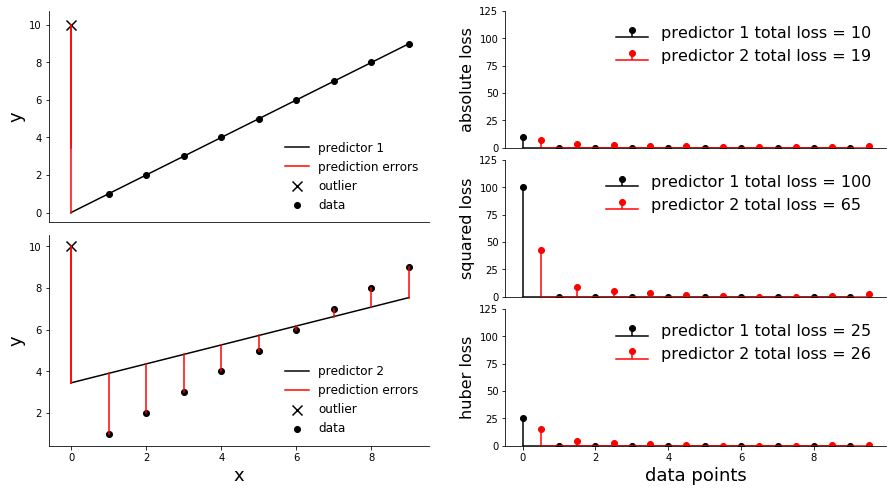

In [20]:
# plotting all results
fig = plt.figure(figsize=(15, 8))
plt.rcParams["legend.frameon"]=False 
gs = GridSpec(nrows=6, ncols=2)

# model 1
ax1 = fig.add_subplot(gs[:3, 0])
ax1.plot(x, y_pred, color='black', ls='-', label='predictor 1')
ax1.scatter(x[0], y_perturbed[0], marker='x', s=100, color='black', label='outlier')
ax1.scatter(x[1:], y_perturbed[1:], color='black', label='data')

# now add individual line for each error point
ax1.plot((x[0], x[0]), (y_perturbed[0], y_pred_perturbed[0]), color='red', label='prediction errors') 
for i in range(len(x)):
    lineXdata = (x[i], x[i]) # same x
    lineYdata = (y_perturbed[i], y_pred[i]) # different y
    ax1.plot(lineXdata, lineYdata, color='red')
    
ax1.set_ylabel('y', fontsize=18)
ax1.set_xticks([], [])
ax1.legend(prop=dict(size=12))

# model 2
ax2 = fig.add_subplot(gs[3:, 0])
ax2.plot(x, y_pred_perturbed, color='black', ls='-', label='predictor 2')

ax2.scatter(x[0], y_perturbed[0], marker='x', s=100, color='black', label='outlier')
ax2.scatter(x[1:], y_perturbed[1:], color='black', label='data')

# now add individual line for each error point
ax2.plot((x[0], x[0]), (y_perturbed[0], y_pred_perturbed[0]), color='red', label='prediction errors') 
for i in range(len(x)):
    lineXdata = (x[i], x[i]) # same x
    lineYdata = (y_perturbed[i], y_pred_perturbed[i]) # different y
    ax2.plot(lineXdata, lineYdata, color='red')
    
ax2.set_xlabel('x', fontsize=18)
ax2.set_ylabel('y', fontsize=18)
ax2.legend(prop=dict(size=12))

# absolute error
ax3 = fig.add_subplot(gs[:2, 1])
ax3.stem(x, abs_error1, linefmt='k-', markerfmt='ko', basefmt='k-', use_line_collection=True)
ax3.stem(x+0.5, abs_error2, linefmt='r-', markerfmt='ro', basefmt='r-', use_line_collection=True)

ax3.set_ylim(0,125)
ax3.set_ylabel('absolute loss', fontsize=16)
ax3.set_xticks([], [])
ax3.legend(["predictor 1 total loss = "+str(abs_error_sum1),
            "predictor 2 total loss = "+str(abs_error_sum2)], prop=dict(size=16))

# square error
ax4 = fig.add_subplot(gs[2:4, 1])
ax4.stem(x, square_error1, linefmt='k-', markerfmt='ko', basefmt='k-', use_line_collection=True)
ax4.stem(x+0.5, square_error2, linefmt='r-', markerfmt='ro', basefmt='r-', use_line_collection=True)

ax4.set_ylim(0,125)
ax4.set_ylabel('squared loss', fontsize=16)
ax4.set_xticks([], [])
ax4.legend(["predictor 1 total loss = "+str(square_error_sum1),
            "predictor 2 total loss = "+str(square_error_sum2)], prop=dict(size=16))

# huber loss
ax5 = fig.add_subplot(gs[4:, 1])
ax5.stem(x, huber1, linefmt='k-', markerfmt='ko', basefmt='k-', use_line_collection=True)
ax5.stem(x+0.5, huber2, linefmt='r-', markerfmt='ro', basefmt='r-', use_line_collection=True)

ax5.set_ylim(0,125)
ax5.set_xlabel('data points', fontsize=18)
ax5.set_ylabel('huber loss', fontsize=16)
ax5.legend(["predictor 1 total loss = "+str(huber_sum1),
            "predictor 2 total loss = "+str(huber_sum2)], prop=dict(size=16))


axes = plt.gcf().get_axes()
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

   
plt.savefig("Huber.png")
plt.show()

In [101]:
# function to calculate Huber loss with different c
def Phi(t,c):
    t = abs(t) # pred error
    flag = (t > c)
    return (~flag) * (0.5*t ** 2) - (flag) * c * (0.5 * c - t)

huber_c3_model1 = [Phi(x,3) for x in (y_perturbed-y_pred)]
huber_c3_model2 = [Phi(x,3) for x in (y_perturbed-y_pred_perturbed)]

huber_c6_model1 = [Phi(x,6) for x in (y_perturbed-y_pred)]
huber_c6_model2 = [Phi(x,6) for x in (y_perturbed-y_pred_perturbed)]

huber_sum_c3_1  = '{:.0f}'.format(sum(huber_c3_model1)[0])
huber_sum_c3_2  = '{:.0f}'.format(sum(huber_c3_model2)[0])

huber_sum_c6_1  = '{:.0f}'.format(sum(huber_c6_model1)[0])
huber_sum_c6_2  = '{:.0f}'.format(sum(huber_c6_model2)[0])

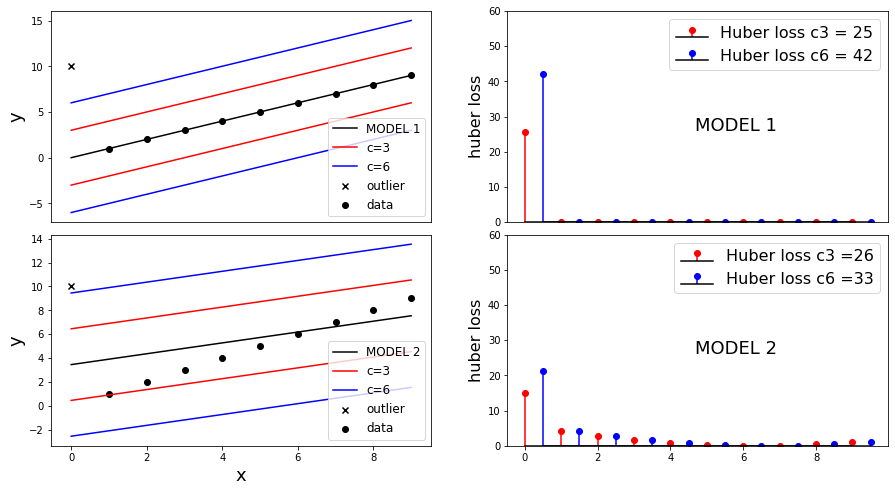

In [155]:
# plotting all results
fig = plt.figure(figsize=(15, 8))
gs = GridSpec(nrows=6, ncols=2)

# model 1
ax1 = fig.add_subplot(gs[:3, 0])
ax1.plot(x, y_pred, color='black', ls='-', label='MODEL 1')
ax1.plot(x, y_pred+3, color='red', ls='-', label ="c=3")
ax1.plot(x, y_pred-3, color='red', ls='-')
ax1.plot(x, y_pred+6, color='blue', ls='-', label ="c=6")
ax1.plot(x, y_pred-6, color='blue', ls='-')

ax1.scatter(x[0], y_perturbed[0], marker='x', color='black', label='outlier')
ax1.scatter(x[1:], y_perturbed[1:], color='black', label='data')

   
ax1.set_ylabel('y', fontsize=18)
ax1.set_xticks([], [])
ax1.legend(prop=dict(size=12))

# model 2
ax2 = fig.add_subplot(gs[3:, 0])
ax2.plot(x, y_pred_perturbed, color='black', ls='-', label='MODEL 2')
ax2.plot(x, y_pred_perturbed+3, color='red', ls='-', label ="c=3")
ax2.plot(x, y_pred_perturbed-3, color='red', ls='-')
ax2.plot(x, y_pred_perturbed+6, color='blue', ls='-', label ="c=6")
ax2.plot(x, y_pred_perturbed-6, color='blue', ls='-')

ax2.scatter(x[0], y_perturbed[0], marker='x', color='black', label='outlier')
ax2.scatter(x[1:], y_perturbed[1:], color='black', label='data')

ax2.set_xlabel('x', fontsize=18)
ax2.set_ylabel('y', fontsize=18)
ax2.legend(prop=dict(size=12))

# huber loss
ax3 = fig.add_subplot(gs[:3, 1])
ax3.stem(x, huber_c3_model1, linefmt='r-', markerfmt='ro', basefmt='k-', use_line_collection=True)
ax3.stem(x+0.5, huber_c6_model1, linefmt='b-', markerfmt='bo', basefmt='k-', use_line_collection=True)

ax3.set_ylim(0,60)
ax3.set_xticks([], [])
ax3.xaxis.set_label_coords(0.6, 0.5)
ax3.set_xlabel('MODEL 1', fontsize=18)
ax3.set_ylabel('huber loss', fontsize=16)
ax3.legend(["Huber loss c3 = "+str(huber_sum_c3_1),
            "Huber loss c6 = "+str(huber_sum_c6_1)], prop=dict(size=16))

ax4 = fig.add_subplot(gs[3:, 1])
ax4.stem(x, huber_c3_model2, linefmt='r-', markerfmt='ro', basefmt='k-', use_line_collection=True)
ax4.stem(x+0.5, huber_c6_model2, linefmt='b-', markerfmt='bo', basefmt='k-', use_line_collection=True)

ax4.set_ylim(0,60)
ax4.xaxis.set_label_coords(0.6, 0.5)
ax4.set_xlabel('MODEL 2', fontsize=18)
ax4.set_ylabel('huber loss', fontsize=16)
ax4.legend(["Huber loss c3 ="+str(huber_sum_c3_2),
            "Huber loss c6 ="+str(huber_sum_c6_2)], prop=dict(size=16))

plt.show()

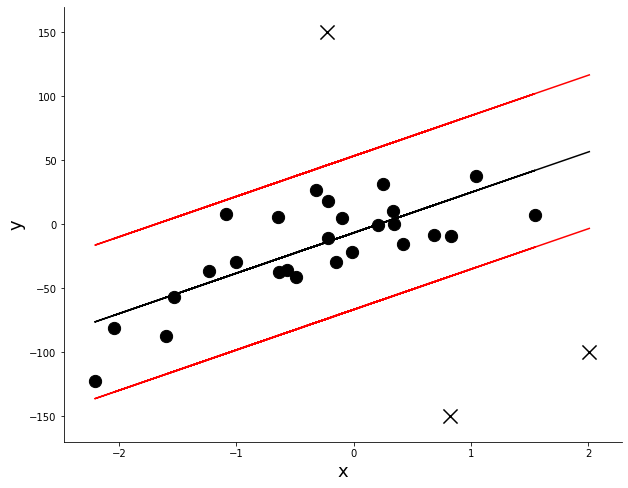

In [50]:
from sklearn import linear_model # import "linear_model" from sklearn
from sklearn.datasets import make_regression # import "make_regression from sklearn.datasets"

np.random.seed(33)

# generate some synthetic dataset
x, y = make_regression(n_samples=30, n_features=1, noise=30) # generate data using the imported "make_regression" function

### fit a linear model to the clean data MODEL 1
reg = linear_model.LinearRegression(fit_intercept=True)
reg = reg.fit(x, y)
y_pred = reg.predict(x)

# now we intentionally perturb the label of the first data point 
y_perturbed = np.copy(y)  
y_perturbed[0] = 150;
y_perturbed[-1] = -100;
y_perturbed[-2] = -150;

### fit a linear model to the perturbed data MODEL 2
reg1 = linear_model.LinearRegression(fit_intercept=True)
reg1 = reg1.fit(x, y_perturbed)
y_pred_perturbed = reg1.predict(x)
# plotting all results
fig = plt.figure(figsize=(10, 8))

# model 1
ax1 = fig.add_subplot()
ax1.plot(x, y_pred, color='black', ls='-', label='Linear predictor')
ax1.plot(x, y_pred+60, color='red', ls='-', label ="boundary")
ax1.plot(x, y_pred-60, color='red', ls='-')

ax1.scatter([x[0],x[-2],x[-1]], [y_perturbed[0],y_perturbed[-2],y_perturbed[-1]], marker='x', s = 200, color='black', label='outlier')
ax1.scatter(x[1:-3], y_perturbed[1:-3], s = 150, color='black', label='data')

ax1.set_ylabel('y', fontsize=18)
ax1.set_xlabel('x', fontsize=18)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

plt.savefig("Huber3.png")
plt.show()